# Exercises in statistics

# Q's for choosing the right test
- Is it categorical or numeric data?
- How big is your sample sizes?
- Are your data normally distributed?
- Do the groups have same distribution?
- How many groups are you comparing?
- (Note, we might still want to use a
non-parametric test if we have a
lot of data, but it is not normally
distributed)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import os

## Exercise 1

In this exercise we will use the penguins dataset (can be imported using the code `penguins_data = sns.load_dataset("penguins")`)

Please answer the following questions:
1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?
2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?
3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.
4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. Remember to justify your choice of test. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

In [3]:
penguins_data = sns.load_dataset("penguins")
penguins_data.info()

# categorical: "species, island, sex"
# numerical:  "bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<Axes: xlabel='species', ylabel='count'>

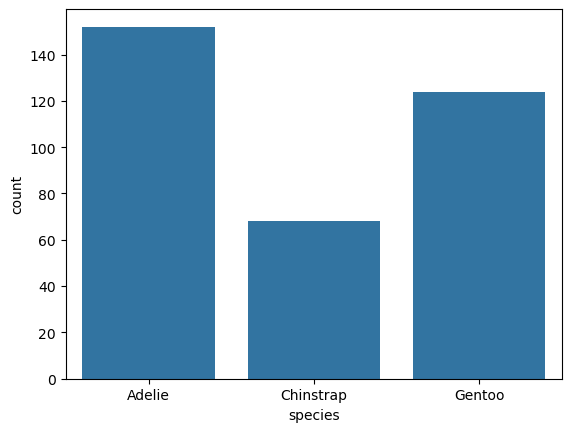

In [4]:
#1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?
diff_spec = penguins_data['species']

sns.countplot(x= diff_spec)

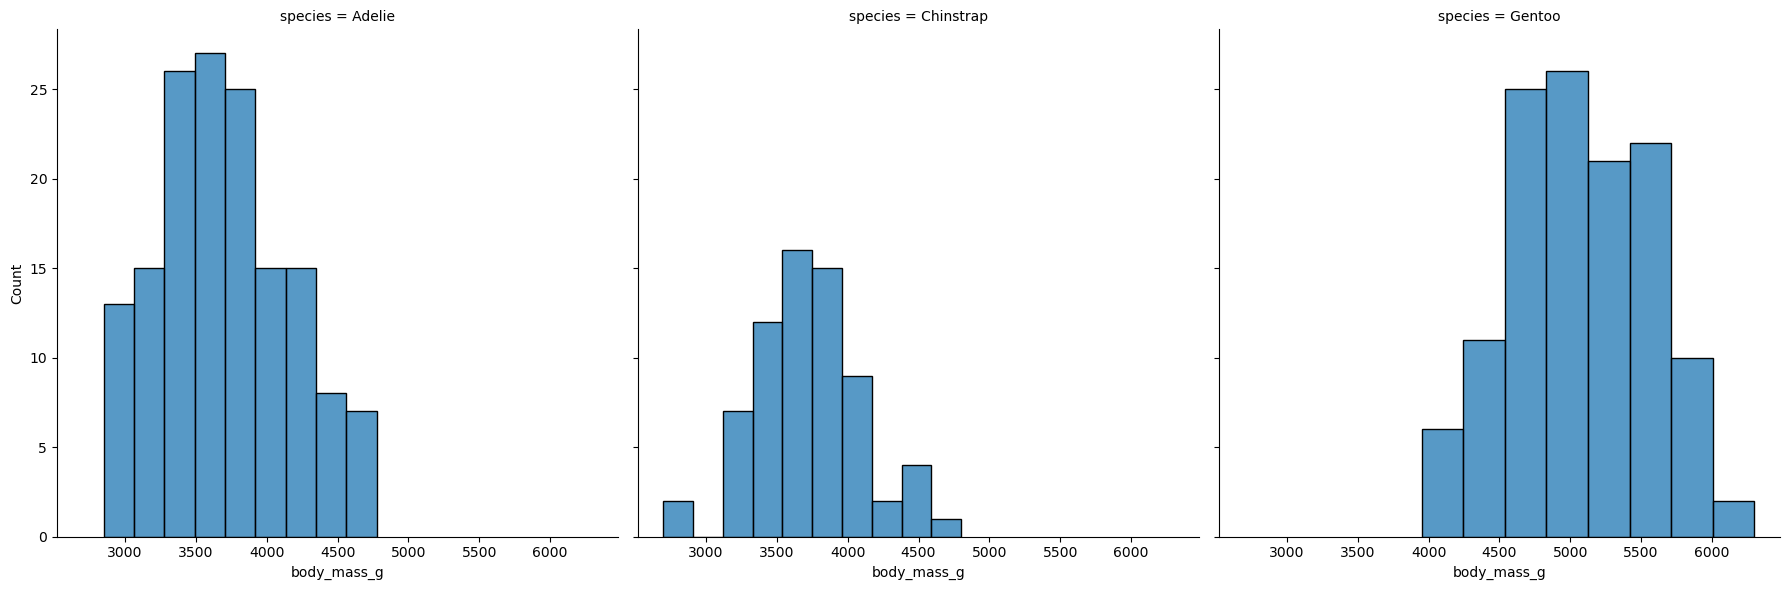

In [5]:
#2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?
g = sns.FacetGrid(data=penguins_data, col="species", height= 6)
g.map(sns.histplot, 'body_mass_g')
plt.show()

#yes, they are normally distributed

In [6]:
#3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. 
# Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

#I will be picking the Student t Test, because:
# 1. I am seeking to compare, not summarize nor investigate relationship between the variables.
# 2. The independent variable we are seeking to investigate is weight (i.e continious as it is a Ratio)
# 3. I consider our sample size large.
# 4. I are comparing between 2 groups (Adelie and Chinstraps)
# 5. While they both are penguins, they are two seperate species and thus not part of the same group.

# Per the hint, we'll be dropping the n/a values.
diff_ad_ch= penguins_data.copy()
diff_ad_ch = penguins_data.dropna()


# The null hypothesis: There is no difference between in weight between Adelie and Chinstraps penguins. Significance level = 0.05.
# The alternate hypothesis: there is a difference between Adelie and Chinstraps.

stats.ttest_ind(diff_ad_ch[diff_ad_ch['species']=='Adelie']['body_mass_g'], diff_ad_ch[diff_ad_ch['species']=='Chinstrap']['body_mass_g'])
# The p-value is larger than the significance level, indicating there is a difference in weight between the two penguins. 


TtestResult(statistic=-0.42011219955863177, pvalue=0.6748289682757558, df=212.0)

In [7]:
#4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. 
# Remember to justify your choice of test. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. 
# Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

# I will again be picking the "Student t Test", because:
# 1. Seeking comparison 
# 2. The independent variable we are seeking to investigate is weight
# 3. The sample size is still considered large.
# 4. I are comparing between 2 groups (this time Chinstraps and Gentoo penguins)
# 5. Still both penguins, and still seperate species. Not the same group.


# The null hypothesis: There is no difference between in weight between Chinstraps and Gentoo penguins. Significance level = 0.05.
# The alternate hypothesis: The difference between Chinstrap and Gentoo penguins will be larger than the one between Adelies and Chinstraps.
stats.ttest_ind(diff_ad_ch[diff_ad_ch['species']=='Chinstrap']['body_mass_g'], diff_ad_ch[diff_ad_ch['species']=='Gentoo']['body_mass_g'])

# The null hypothesis has been disproven, and the alternative hypothesis has been confirmed.



TtestResult(statistic=-19.33454832714746, pvalue=2.781745579785546e-46, df=185.0)

## Exercise 2

Load in the "fb_like_and_share.csv" data and answer the following questions:

1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).
2. Is there a difference in the distribution of share counts for photos and videos? Justify your choice of test(s).
3. Perform an ANOVA test to test if there is a difference in means across type of posts for shares. Does it make sense to perform this ANOVA test?
4. Is there actually a statistical significant difference in the distribution of share counts for any two groups?

In [26]:
path = "data\\fb_like_and_share.csv"
fb = pd.read_csv(path, delimiter=';')
fb['type']

0      video
1      photo
2      video
3       link
4      photo
5      photo
6      photo
7     status
8      photo
9      video
10     photo
11     photo
12     photo
13     video
14     photo
15    status
16      link
17     video
18    status
19     photo
20     video
21    status
22     video
23    status
24    status
25      link
26     photo
27     photo
28     photo
29      link
30     video
31     video
Name: type, dtype: object

In [9]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             32 non-null     object
 1   likes_count_fb   32 non-null     int64 
 2   shares_count_fb  32 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 900.0+ bytes


In [10]:
#flexing my print to console skills and also displaying the overview of the categorical variable "type"
print(f'{fb['type'].describe()}')

count        32
unique        4
top       photo
freq         13
Name: type, dtype: object


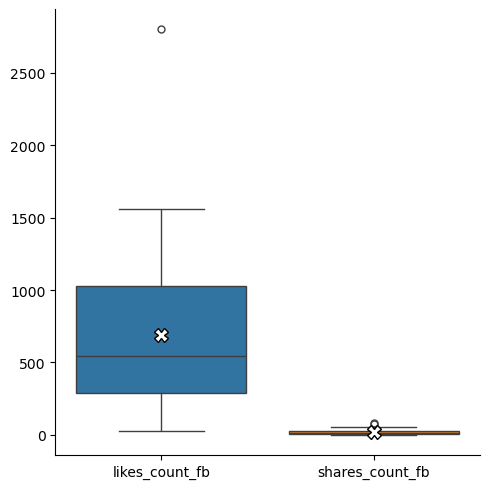

In [11]:
sns.catplot(data=fb, kind="box", 
            showmeans =True, meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

#clear to see there is a great discreptancy between shares and likes. Noticably there is few outliers.

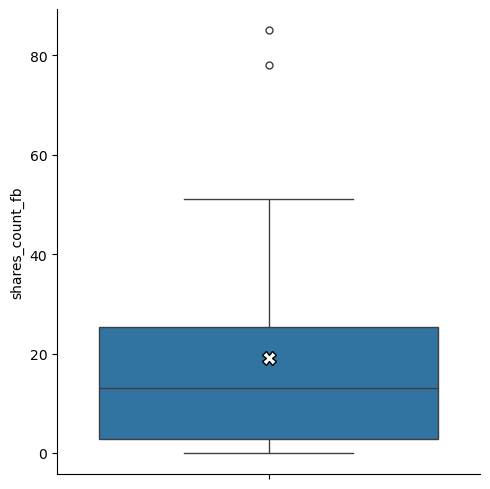

In [12]:
#lets zoom in on shares, because we are not able to see much about it from the view above.
sns.catplot(data=fb['shares_count_fb'], kind="box", 
            showmeans =True, meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

#Here we see a few in posts outliers in amount of shares, as well as the mean is slightly larger than the median of the shares.

# 1.1 Justification of chosen test for determination of difference in distrubtion of likes for video/photo 

In [13]:
#1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).
# To justify choice of test(s):
# 1. To start out - We are comparing between likes for photos and videos - So a comparison.
# 2. The type of data is Continuos as it is a count, which is a Ratio.
# 3. Whether or not I should select a Parametric or Non-Parametric test:
# 3.1 There is less than 15 for the two groups (photos and videos).
# 3.2 its quite difficult to see whether or not it is normally distributed.


# could use .normaltest
# https://docs.scipy.org/doc/scipy/tutorial/stats/hypothesis_normaltest.html#hypothesis-normaltest

like_distribution = fb[fb['type'].isin(['video', 'photo'])]

like_distribution = like_distribution[['type','likes_count_fb']]
res = stats.normaltest(like_distribution['likes_count_fb'])
res.pvalue
#"The scipy.stats.normaltest function tests the null hypothesis that a sample comes from a normal distribution."
#this test shows the is a low probability that the data is normally distributed.

# 4. We don't perform a Kruskal-Wallis Test as that is for 3+ Non-parametic tests. This leaves us:
# 5. Signed-Rank and Mann-Whitney U Test! - We choose the Mann-Whitney U Test because, our two groups are different (i.e. Photos and videos)

0.0002980156653241424

# 1.2 The actual test for photos/videos

In [14]:
# The null hypothesis: There is no difference between in likes between the categories photo and video. 
# Significance level = 0.05.
# The alternate hypothesis: There will be a strong certainty that here is a difference.

stats.mannwhitneyu(fb[fb['type']=='video']['likes_count_fb'], fb[fb['type']=='photo']['likes_count_fb'])
# The null hypothesis has been rejected, we conclude there is a statistically significant difference between the two types.



MannwhitneyuResult(statistic=26.0, pvalue=0.0326063047830172)

# 2.1 Justification of chosen test for determination of difference in distrubtion of shares for video/photo 

In [15]:
#1. Is there a difference in the distribution of shares for photos and videos? Justify your choice of test(s).
# To justify choice of test(s):
# 1. To start out - We are still comparing between likes for photos and videos - So still a comparison.
# 2. Still a ratio as it still is count we are looking at. Thus still Continious.
# 3. Whether or not I should select a Parametric or Non-Parametric test:
# 3.1 There is less than 15 for the two groups (photos and videos).
# 3.2 lets just do the normal test again.

like_distribution = fb[fb['type'].isin(['video', 'photo'])]

like_distribution = like_distribution[['type','shares_count_fb']]
res = stats.normaltest(like_distribution['shares_count_fb'])
res.pvalue
# Pvalue is 0.0025838331956452606
# So even smaller probability we are working with a normally distributed data.

# 4. They are different groups, so we are this time looking at performing another Mann Withney U test



0.0025838331956452606

# 2.2 The actual test for photos/videos

In [ ]:
# The null hypothesis: There is no difference between in shares between the categories photo and video. 
# Significance level = 0.05.
# The alternate hypothesis: There will be a strong certainty that here is a difference.

stats.mannwhitneyu(fb[fb['type']=='video']['shares_count_fb'], fb[fb['type']=='photo']['shares_count_fb'])
# The null hypothesis has failed to be rejected as the pvalue is > 0.05, and thus we can assume there is no statistic difference between photo and video
# when it comes to shares.
# we reject the alternate hypothesis and remember back to when we used facebook we also never shared neither photos nor videos, cause that feature just sucks.

MannwhitneyuResult(statistic=42.0, pvalue=0.28368085995763015)

# 3. Perform an ANOVA test to test if there is a difference in means across type of posts for shares. Does it make sense to perform this ANOVA test?


In [ ]:
stats.f_oneway(fb[fb['type']=='video']['shares_count_fb'], fb[fb['type']=='photo']['shares_count_fb'])
# No it does not make sense to perform a ANOVA test for this case. Mostly cause the data is neither large nor distributed normally.
# Ideally even in that case we would properly choose a students T test as that operates on the correct amount of groups. 
# for a non-parametic alternative for the ANOVA, you'd go with a Kruskal-Wallis test. 

F_onewayResult(statistic=0.5998938392520804, pvalue=0.44767895541165603)

# Is there actually a statistical significant difference in the distribution of share counts for any two groups?

In [29]:
#lets see. 
# For the four type (video, photo, status and link), we perfrom a Kruskal-Wallis test. 

# The null hypothesis: There is no difference between in shares between any of the categories. 
# Significance level = 0.05.
# no alternative hypothesis as we aggree with the null hypothesis, cause sharing was an generally dull feature
stats.kruskal(fb[fb['type']=='video']['shares_count_fb'], fb[fb['type']=='photo']['shares_count_fb'], fb[fb['type']=='link']['shares_count_fb'], fb[fb['type']=='status']['shares_count_fb'])

#The pvalue falls outside of the 0.05 significance level set, thus we can not reject the null hypothesis.


KruskalResult(statistic=2.9065336213816875, pvalue=0.40626147645400257)

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [61]:
es = pd.read_csv('.\\data\\energySoftware.csv')
es

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671
...,...,...,...,...,...,...
1436,bubblesort_ll,0.013184,0.014038,,,2.394
1437,bubblesort_ll,0.021362,0.014343,,,2.428
1438,bubblesort_ll,0.013672,0.014221,,,2.479
1439,bubblesort_ll,0.019531,0.014526,,,2.537


In [43]:
es['test'].value_counts()

test
bubblesort         361
bubblesort_func    360
bubblesort_ll2     360
bubblesort_ll      360
Name: count, dtype: int64

# 1. Plot the distribution of CPU for each test type


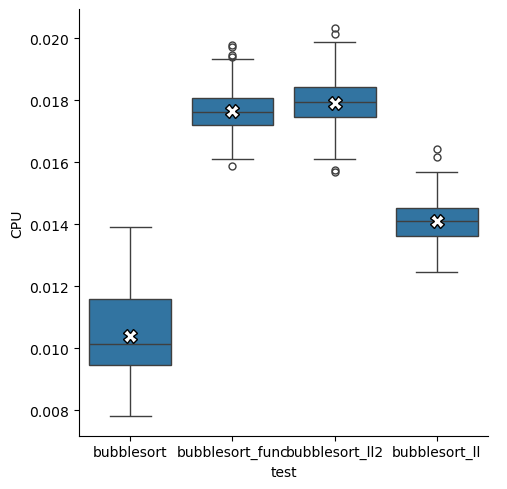

In [ ]:
sns.catplot(x='test', y="CPU", data = es, kind="box", showmeans=True, meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

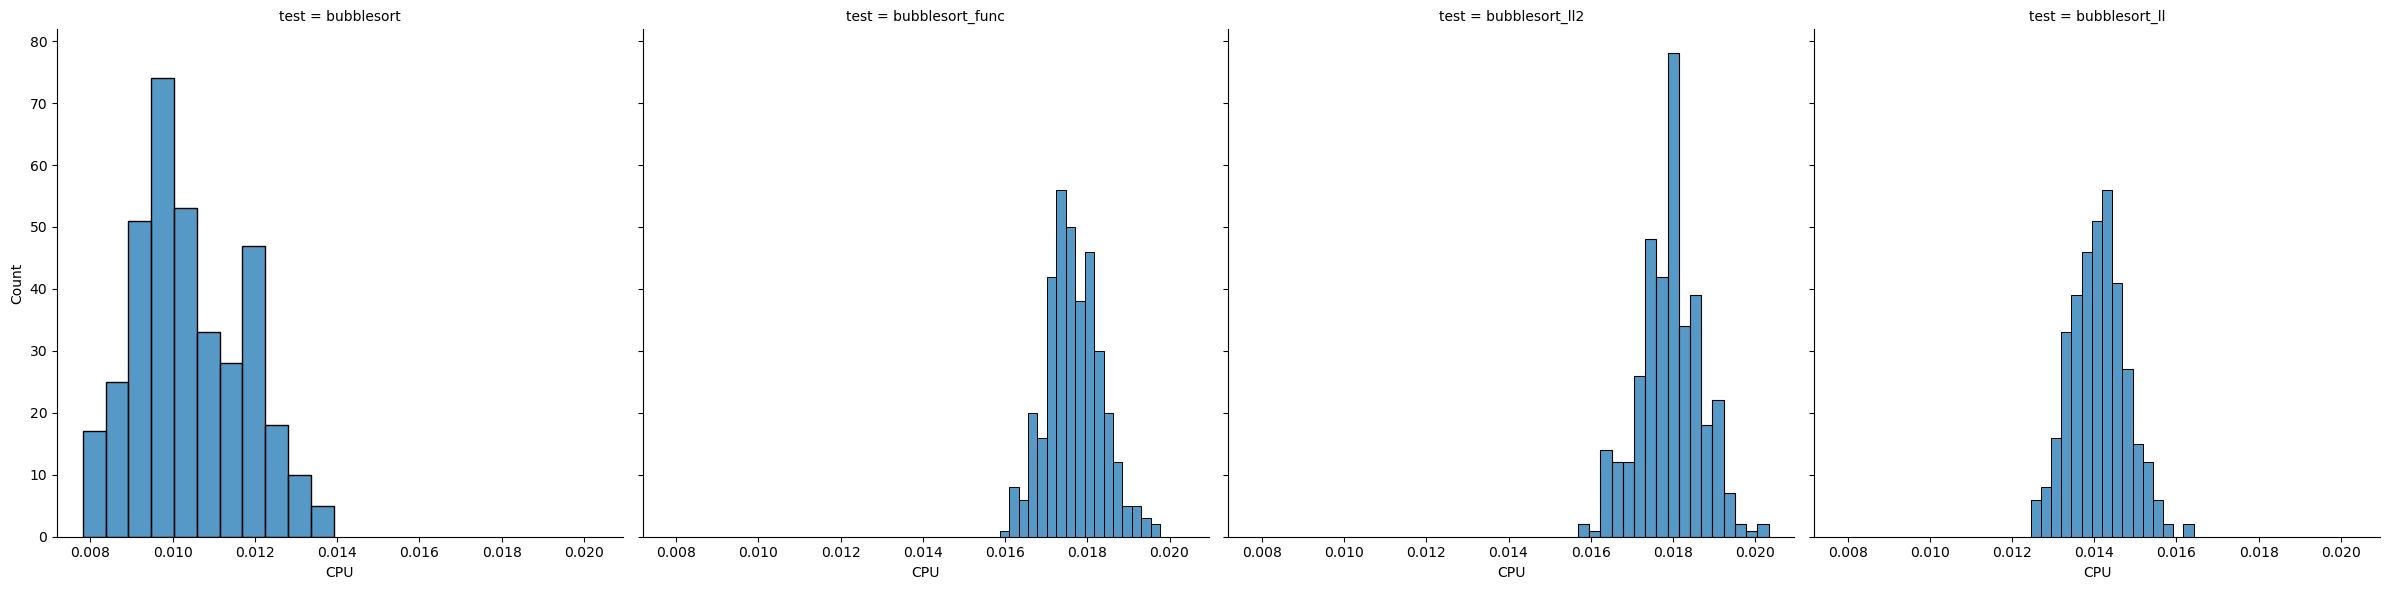

In [ ]:
g = sns.FacetGrid(data=es, col="test", height= 6)
g.map(sns.histplot, 'CPU')
plt.show()
#looks very distributed

In [65]:
algo = es[es['test'].isin(['bubblesort', 'bubblesort_ll'])]

algo = algo[['test','CPU']]

res = stats.normaltest(algo['CPU']) 
res.pvalue

# stats.normaltest(es[es['test'] == 'bubblesort'])
# stats.normaltest agrees, very *very* normalized 

1.5569272557242618e-201

# 2.1 Justification of choice of test(s) for difference bubblesort and bublesort_II 

In [ ]:
# Comparison
# Continious
# Large sample size
# Normalized distribution thus we do parametric tests
# 2 groups
# difference in groups

#thus : Student t-test



# 2.2 Actual testing

In [67]:
#null hypothesis is, There is no significant difference in CPU usage between the two algorithms.
#alternative hypothesis is that there is a difference. 
#level of significance is > 0.05
stats.ttest_ind(es[es["test"]=="bubblesort"]["CPU"], es[es["test"]=="bubblesort_ll"]["CPU"])
# pvalue is so small and under our significance level, that we can reject the null hypothesis, and say there is a statistic difference between the types 
# of algorithms 

TtestResult(statistic=-47.4605163039462, pvalue=9.831404686370246e-224, df=719.0)

# 3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?


In [69]:
stats.ttest_ind(es[es["test"]=="bubblesort"]["CPU"], es[es["test"]=="bubblesort_ll2"]["CPU"])
# Since the p-value is 0.0, you can reject the null hypothesis at any logically reasonable significance level.

# There is certainty that there is a difference, however I am unsure how to decipher the effect or size of the difference

TtestResult(statistic=-93.63515448221312, pvalue=0.0, df=719.0)

# 4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
